In [77]:
import pandas as pd 

In [78]:
# Importing the dataset
epl = pd.read_csv("Project_13803342/dataframed_cleaned/epl_data_matches_copy.csv")

In [79]:
# Creating lists of different features

all_both = ["xga","xg","sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y","poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y" ,"kp", "1/3" ,"ppa" ,"crspa" ,"prog", "sca_x", "passlive_x" ,"to_x" ,"sca_y" ,"venue_code" ,"opp_code", "hour", "day_code", "referee_code" ,"formation_code", "captain_code", "tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x","int_x", "err_x", "tkl_y",  "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "int_y", "err_y"
]
both_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
team_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x"]
opp_shooting = ["sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
both_possession = ["poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y"]
team_possession = ["poss","succ%_x","cpa_x","1/3"]
opp_possession = ["poss_y","succ%_y","cpa_y"]
team_creation = ["sca_x", "passlive_x" ,"to_x"]
both_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x", "tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
team_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x"]
opp_def = ["tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss_x", "succ%_x", "captain_code", "1/3", "opp_code"]
epl = epl.drop(columns = "target")

f1 = all_both 
f2 = both_shooting
f3 = team_shooting
f4 = opp_shooting 
f5 = both_possession
f6 = team_possession 
f7 = opp_possession 
f8 = team_creation
f9 = both_def 
f10 = team_def 
f11 = opp_def


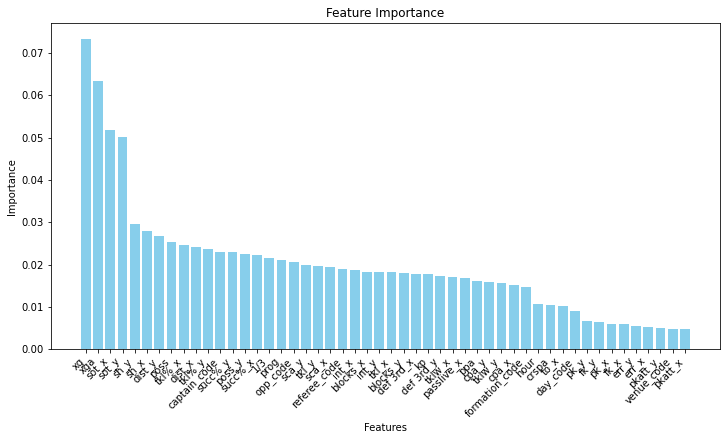

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


x = epl[f1]  # Features
y = epl['result']  # Target variable

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x, y)

# Get feature importances
importances = rf_model.feature_importances_

# Createing a dataframe to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': f1, 'Importance': importances})

# Sorting the dataframe by importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")
plt.show()

In [81]:
# Creating a new variable consisting of 15 features with the highest importance score
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss", "succ%_x", "captain_code", "1/3", "opp_code",'prog']
f12 = important

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# list of the different features
features = [f1,f2, f3, f4, f5, f6, f7, f8, f9, f10, f11,f12]


x = epl.drop('result', axis=1)  # Features
y = epl['result']  # Target variable

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising an empty dictionary to store results
results = {}

# Looping through each feature and testing out the model
for i, feature in enumerate(features, 1):
    # Select the current feature
    x_train_current = x_train[feature]
    x_test_current = x_test[feature]
    
    # Creating a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Training the model on the training data
    rf_model.fit(x_train_current, y_train)
    
    # Evaluating the model's performance on the testing data
    y_pred = rf_model.predict(x_test_current)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing the results in the dictionary
    results[f'f{i}'] = {'accuracy': accuracy, 'classification_report': report}

# Printing out the results
for key, value in results.items():
    print(f"Feature {key}:")
    print(f"Accuracy: {value['accuracy']}")
    print("Classification Report:")
    report_df = pd.DataFrame(value['classification_report']).transpose()
    print(report_df)

print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])

Feature f1:
Accuracy: 0.6124523506988564
Classification Report:
              precision    recall  f1-score     support
D              0.266667  0.043478  0.074766  184.000000
L              0.622093  0.745645  0.678288  287.000000
W              0.629540  0.822785  0.713306  316.000000
accuracy       0.612452  0.612452  0.612452    0.612452
macro avg      0.506100  0.537303  0.488787  787.000000
weighted avg   0.541985  0.612452  0.551246  787.000000
Feature f2:
Accuracy: 0.579415501905972
Classification Report:
              precision    recall  f1-score     support
D              0.310811  0.125000  0.178295  184.000000
L              0.604294  0.686411  0.642741  287.000000
W              0.609819  0.746835  0.671408  316.000000
accuracy       0.579416  0.579416  0.579416    0.579416
macro avg      0.508308  0.519416  0.497481  787.000000
weighted avg   0.537897  0.579416  0.545664  787.000000
Feature f3:
Accuracy: 0.4891994917407878
Classification Report:
              precision  

In [92]:
import pandas as pd


# Defining the columns to normalise
columns_to_normalise = ['xga', 'xg', 'sh_x', 'sot_x', 'dist_x', 'fk_x', 'pk_x', 'pkatt_x', 'sh_y', 'sot_y', 'dist_y', 'fk_y', 'pk_y', 'pkatt_y', 'poss_x', 'poss_y', 'succ%_x', 'cpa_x', 'succ%_y', 'cpa_y', 'kp', '1/3', 'ppa', 'crspa', 'prog', 'sca_x', 'passlive_x', 'to_x', 'sca_y', 'venue_code', 'opp_code', 'hour', 'day_code', 'referee_code', 'formation_code', 'captain_code', 'tkl_x', 'tklw_x', 'def 3rd_x', 'tkl%_x', 'blocks_x','int_x', 'err_x', 'tkl_y', 'tklw_y', 'def 3rd_y', 'tkl%_y', 'blocks_y', 'int_y', 'err_y']

# Creating a min-max normalisation function
def min_max_normalisation(column):
    return (column - column.min()) / (column.max() - column.min())

# Applying min-max normalisation to selected columns
normalised_data = epl[columns_to_normalise].apply(min_max_normalisation)

# Appending the normalised columns with the original dataframe
epl_normalised = pd.concat([epl.drop(columns=columns_to_normalise), normalised_data], axis=1)

In [84]:
#1 
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Splitting data into features (x) and target (y)
x = epl[f1]
y = epl["result"]

# Defining a parameter grid
param_grid = {
     'n_estimators': [100, 200, 300],           # Number of trees in the forest
     'max_depth': [None, 10, 20, 30]             
}


# Initialising a RF classifier
rf = RandomForestClassifier(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results1 = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results1)
print("Mean Accuracy:", cv_results1.mean())

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Cross-Validation Results:
[0.64673913 0.64673913 0.5923913  0.63043478 0.63586957 0.57608696
 0.58469945 0.6284153  0.61202186 0.65027322]
Mean Accuracy: 0.620367070563079


In [85]:
#2 Normalised 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = epl_normalised[f1]
y = epl_normalised["result"]

# Defining a parameter grid
param_grid = {
     'n_estimators': [100, 200, 300],           # Number of trees in the forest
     'max_depth': [None, 10, 20, 30]             
}


# Initialising KNN classifier
rf = RandomForestClassifier(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_norm = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm)
print("Mean Accuracy:", cv_results_norm.mean())

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Cross-Validation Results:
[0.64130435 0.64673913 0.5923913  0.63043478 0.64130435 0.58152174
 0.59016393 0.61748634 0.60655738 0.67759563]
Mean Accuracy: 0.6225498930862438


In [86]:
#3 Balanced w-SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
# Splitting data into features (x) and target (y)
x = epl[f1]
y = epl["result"]
# Defining a parameter grid
param_grid = {
     'n_estimators': [100, 200, 300],           # Number of trees in the forest
     'max_depth': [None, 10, 20, 30]             
}

# Initialising a RF classifier
rf = RandomForestClassifier(random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialising GridSearchCV with RF classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote)
print("Mean Accuracy:", cv_results_smote.mean())

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Cross-Validation Results:
[0.66517857 0.65178571 0.64732143 0.64285714 0.62946429 0.68303571
 0.77678571 0.82589286 0.80717489 0.78475336]
Mean Accuracy: 0.7114249679692505


In [87]:
#4 Balanced w-SMOTE (normalised)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE


# Splitting data into features (x) and target (y)
x = epl_normalised[f1]
y = epl_normalised["result"]

# Defining a parameter grid
param_grid = {
     'n_estimators': [100, 200, 300],           # Number of trees in the forest
     'max_depth': [None, 10, 20, 30]             
}

# Initialising a RF classifier
rf = RandomForestClassifier(random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote_norm = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote_norm)
print("Mean Accuracy:", cv_results_smote_norm.mean())

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 300}
Cross-Validation Results:
[0.63392857 0.64285714 0.62053571 0.66517857 0.62946429 0.6875
 0.78125    0.80357143 0.79372197 0.83408072]
Mean Accuracy: 0.7092088404868674


In [88]:
# Returning the results of the Cross-Validation
print("Accuracy of unbalanced dataset: ")
print("Unnormalised", cv_results1.mean())
print("Normalised",cv_results_norm.mean())
print("\nAccuracy of balanced dataset with SMOTE: ")
print("Unnormalised" , cv_results_smote.mean())
print("Normalised",cv_results_smote_norm.mean())

Accuracy of unbalanced dataset: 
Unnormalised 0.620367070563079
Normalised 0.6225498930862438

Accuracy of balanced dataset with SMOTE: 
Unnormalised 0.7114249679692505
Normalised 0.7092088404868674


In [89]:
# BEST MODEL
from sklearn.metrics import confusion_matrix

# Splitting data into features (x) and target (y)
x = epl_normalised[f1]
y = epl_normalised["result"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

# Initialize RF classifier
rf = RandomForestClassifier(max_depth=20,n_estimators=300,random_state=42) 
rf.fit(x_train_resampled,y_train_resampled)
pred = rf.predict(x_test)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
report = classification_report(y_test,pred)
print(report)
conf_matrix = confusion_matrix(y_test,pred)
print(conf_matrix)


0.6035578144853876
              precision    recall  f1-score   support

           D       0.36      0.15      0.21       184
           L       0.62      0.71      0.66       287
           W       0.64      0.78      0.70       316

    accuracy                           0.60       787
   macro avg       0.54      0.54      0.52       787
weighted avg       0.57      0.60      0.57       787

[[ 27  77  80]
 [ 27 203  57]
 [ 22  49 245]]


Some of the code from the heatmap below was extracted from kaggle.
- sns heatmaps

'https://www.kaggle.com/code/alkanerturan/stroke-prediction-smote-gridsearch-model-comp'

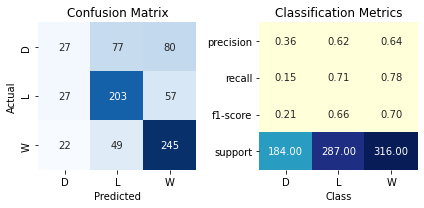

0.5378818970116613 : is the precision score
0.5431242197672389 : is the recall score
0.5229296491474142 : is the f1 score
Highest accuracy score for Random Forest: 
60.36


In [90]:
import seaborn as sns
class_names = ["D", "L","W"]
report = classification_report(y_test, pred, target_names=class_names, output_dict=True)

# Set up plot size and style
plt.figure(figsize=(6, 3))

# Plot confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True,cbar=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot classification report heatmap
plt.subplot(1, 2, 2)
sns.heatmap(np.array([[report[label][metric] for label in class_names] for metric in report[class_names[0]]]),
            annot=True, cbar=False,fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=report[class_names[0]].keys())

plt.xticks(rotation=0)
plt.yticks(rotation=0)
#plt.ylabel("Metrics")
plt.xlabel("Class")
plt.title("Classification Metrics")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print(precision_score(y_test, pred, average='macro'), ": is the precision score")
print(recall_score(y_test, pred, average='macro'), ": is the recall score")
print(f1_score(y_test, pred, average='macro'), ": is the f1 score")

best = accuracy * 100
print("Highest accuracy score for Random Forest: ")
print(round(best,2))